ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/tkmagesh77/Documents/Training/Nutanix-Beginner-ML-Aug-2025/ml_practice/lib/python3.12/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tkmagesh77/Documents/Training/Nutanix-Beginner-ML-Aug-2025/ml_practice/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/Users/tkmagesh77/Documents/Training/Nutanix-Beginner-ML-Aug-2025/ml_practice/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
               ^^^^^^^^^^^^^^^^^^
  File "/Users/tkmagesh77/Documents/Training/Nutanix-Beginner-ML-Aug-2025/ml_practice/lib/python3.12/site-pac

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      

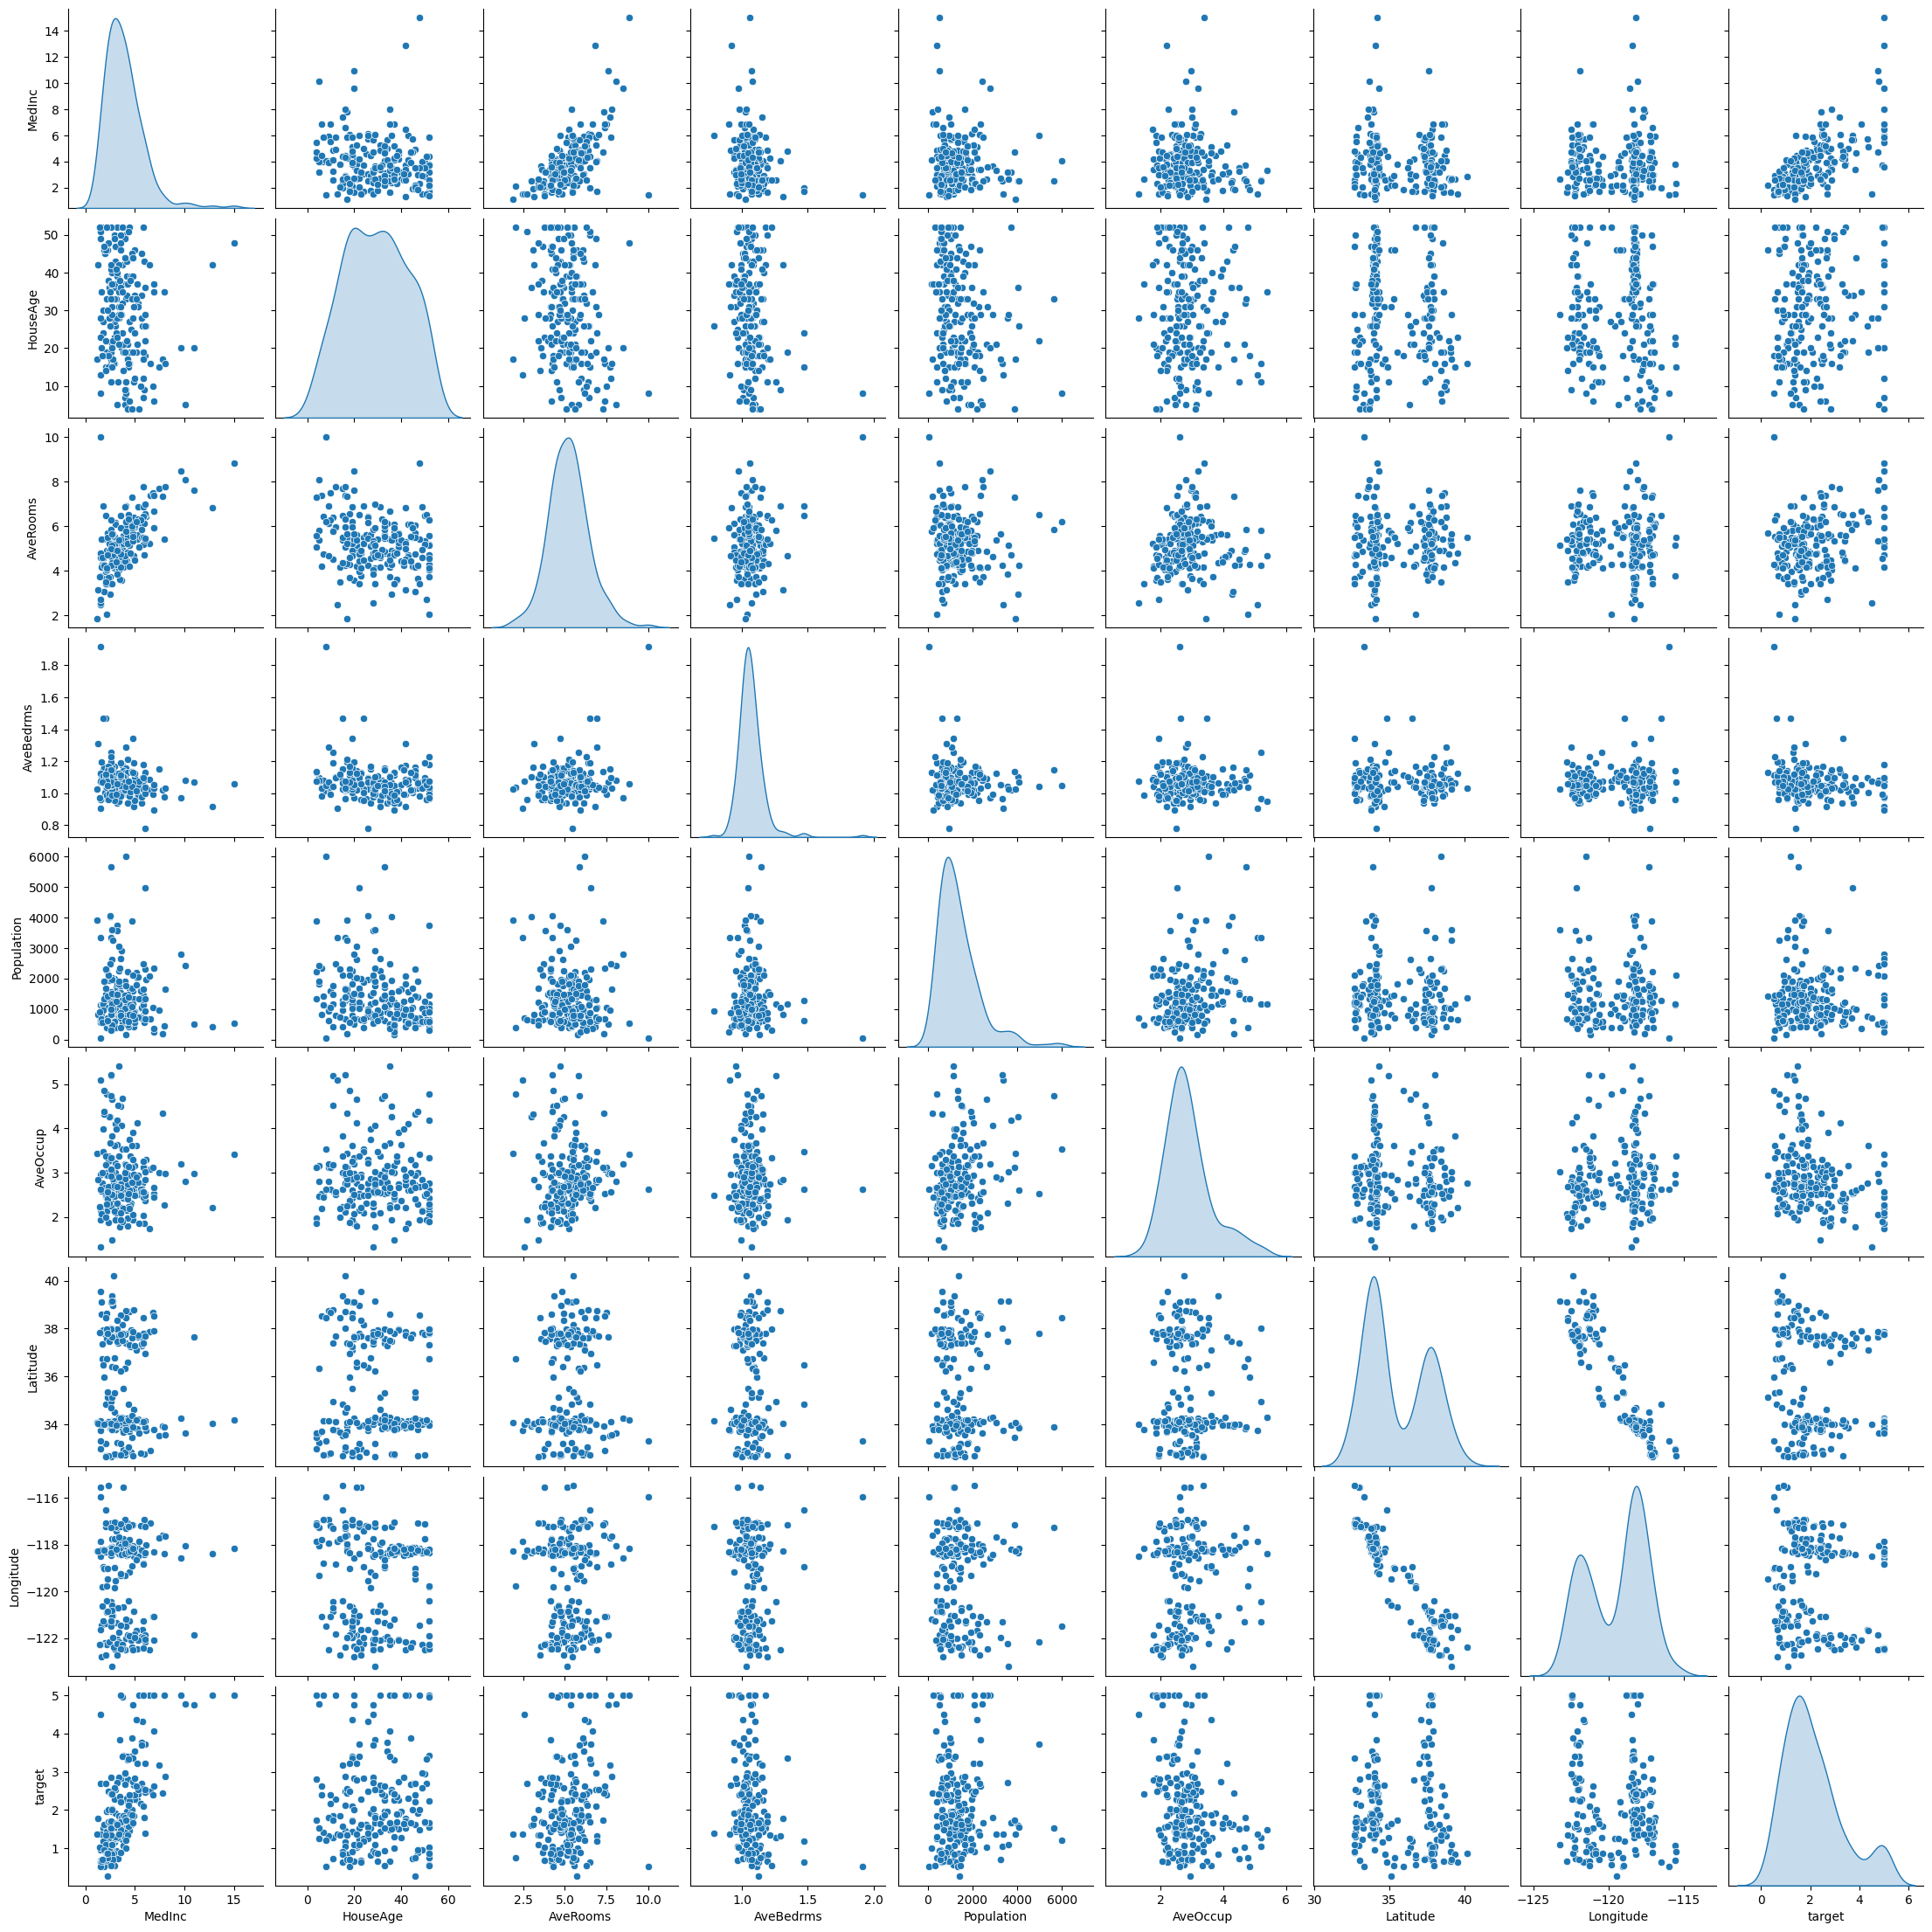

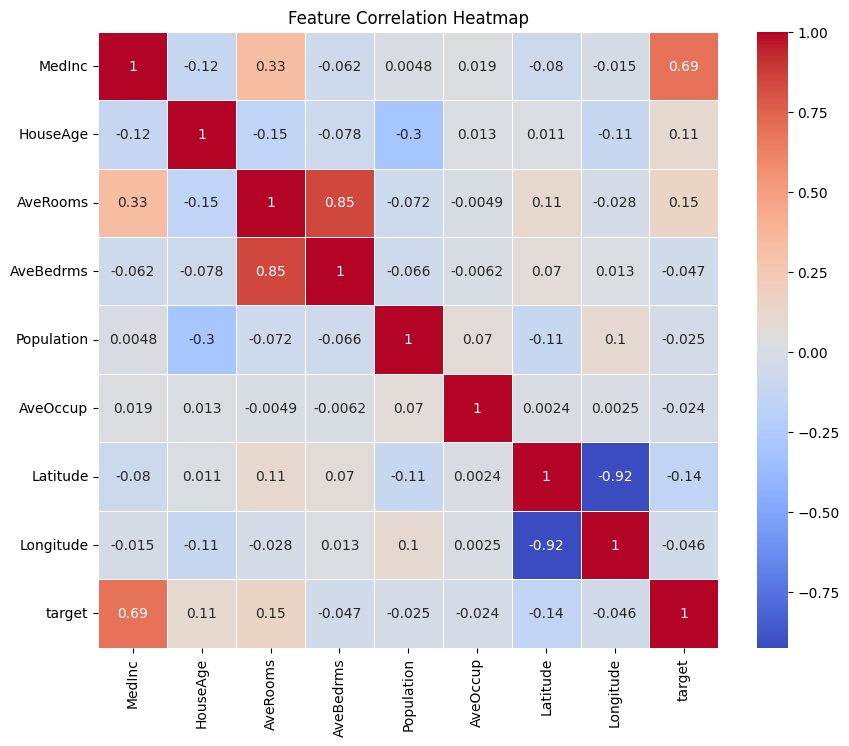

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
california = datasets.fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['target'] = california.target  # House price

# Display first few rows
print(df.head())

# Check data summary
print("\nSummary Statistics:\n", df.describe())

# Pairplot for feature relationships
sns.pairplot(df.sample(200), diag_kind="kde")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
# Splitting dataset into train and test sets (80% train, 20% test)
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-NN Regressor (Choosing k=5)
knn_regressor = KNeighborsRegressor(n_neighbors=13, metric='euclidean')
knn_regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_regressor.predict(X_test_scaled)


Mean Absolute Error (MAE): 0.44
Mean Squared Error (MSE): 0.42
Root Mean Squared Error (RMSE): 0.65
R-squared (R² Score): 0.68


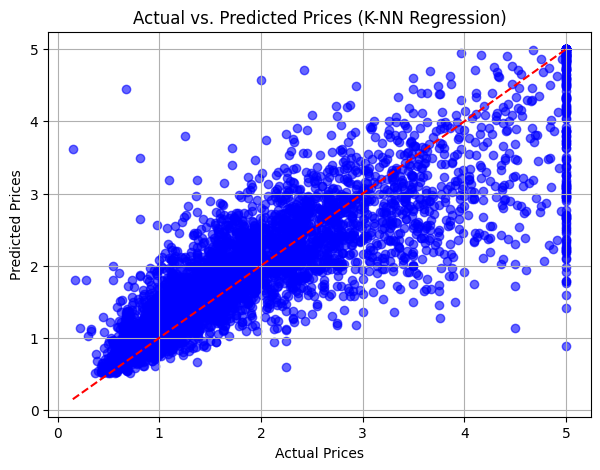

In [6]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # 45-degree reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (K-NN Regression)")
plt.grid()
plt.show()


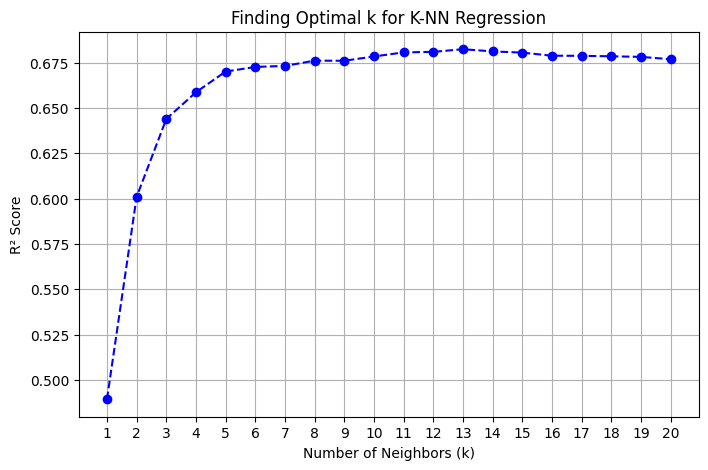

In [4]:
# Testing different k values
k_values = range(1, 21)
r2_scores = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, y_pred))

# Plot k vs R² Score
plt.figure(figsize=(8,5))
plt.plot(k_values, r2_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("R² Score")
plt.title("Finding Optimal k for K-NN Regression")
plt.xticks(k_values)
plt.grid(True)
plt.show()
